In [6]:
import pandas as pd
import numpy as np
import seaborn as sp
import matplotlib as mplot
from collections import defaultdict
from scipy import stats
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [3]:
features = pd.read_csv('features_clean.csv')

In [4]:
features

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,20100205,1643690.90,42.31,2.572,211.096358,8.106,False
1,1,20100212,1641957.44,38.51,2.548,211.242170,8.106,True
2,1,20100219,1611968.17,39.93,2.514,211.289143,8.106,False
3,1,20100226,1409727.59,46.63,2.561,211.319643,8.106,False
4,1,20100305,1554806.68,46.50,2.625,211.350143,8.106,False
5,1,20100312,1439541.59,57.79,2.667,211.380643,8.106,False
6,1,20100319,1472515.79,54.58,2.720,211.215635,8.106,False
7,1,20100326,1404429.92,51.45,2.732,211.018042,8.106,False
8,1,20100402,1594968.28,62.27,2.719,210.820450,7.808,False
9,1,20100409,1545418.53,65.86,2.770,210.622857,7.808,False


In [9]:
features_list = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'IsHoliday']

In [7]:
out_sales, pred_sales = patsy.dmatrices('Unemployment ~ Weekly_Sales', features)
mod_sales = sm.OLS(out_sales, pred_sales)
res_sales = mod_sales.fit()

In [8]:
print(res_sales.summary())

                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     73.35
Date:                Thu, 14 Mar 2019   Prob (F-statistic):           1.34e-17
Time:                        14:08:56   Log-Likelihood:                -13142.
No. Observations:                6435   AIC:                         2.629e+04
Df Residuals:                    6433   BIC:                         2.630e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.3686      0.049    170.751   

In [10]:
out_temp, pred_temp = patsy.dmatrices('Unemployment ~ Temperature', features)
mod_temp = sm.OLS(out_temp, pred_temp)
res_temp = mod_temp.fit()

out_fuel, pred_fuel = patsy.dmatrices('Unemployment ~ Fuel_Price', features)
mod_fuel = sm.OLS(out_fuel, pred_fuel)
res_fuel = mod_fuel.fit()

out_cpi, pred_cpi = patsy.dmatrices('Unemployment ~ CPI', features)
mod_cpi = sm.OLS(out_cpi, pred_cpi)
res_cpi = mod_cpi.fit()

In [11]:
print(res_sales.summary(), res_temp.summary(), res_fuel.summary(), res_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     73.35
Date:                Thu, 14 Mar 2019   Prob (F-statistic):           1.34e-17
Time:                        14:12:25   Log-Likelihood:                -13142.
No. Observations:                6435   AIC:                         2.629e+04
Df Residuals:                    6433   BIC:                         2.630e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.3686      0.049    170.751   

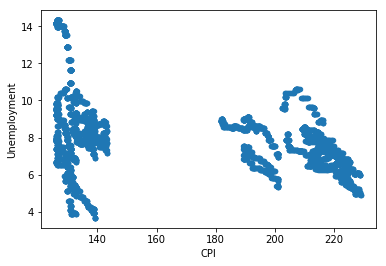

In [33]:
features.plot.scatter(x='CPI', y='Unemployment')

In [15]:
out1, pred1 = patsy.dmatrices('Unemployment ~ Weekly_Sales + CPI', features)
mod1 = sm.OLS(out1, pred1)
res1 = mod1.fit()

In [16]:
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     388.2
Date:                Thu, 14 Mar 2019   Prob (F-statistic):          6.57e-160
Time:                        14:21:57   Log-Likelihood:                -12812.
No. Observations:                6435   AIC:                         2.563e+04
Df Residuals:                    6432   BIC:                         2.565e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.9938      0.110    100.023   

In [27]:
out2, pred2 = patsy.dmatrices('Unemployment ~ Weekly_Sales + CPI + Fuel_Price + Temperature', features)
mod2 = sm.OLS(out2, pred2)
res2 = mod2.fit()

In [28]:
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     270.6
Date:                Thu, 14 Mar 2019   Prob (F-statistic):          2.65e-215
Time:                        14:25:18   Log-Likelihood:                -12678.
No. Observations:                6435   AIC:                         2.537e+04
Df Residuals:                    6430   BIC:                         2.540e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       11.9578      0.209     57.213   

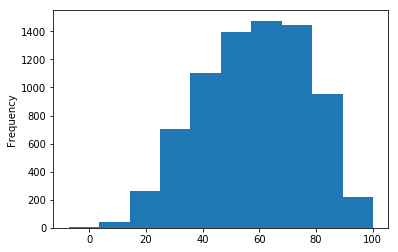

In [30]:
features['Temperature'].plot.hist()